# Objective: Create plots of stellar mass vs. conditional mass function

In [379]:
import os

In [380]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [381]:
from astropy.io.ascii import read
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.io import fits
import fitsio
import seaborn

In [382]:
# Reading in the RedMaPPer iSEDfit catalog.
rmpath = os.path.join(os.sep, 'global', 'work', 'projects', 'redmapper')
rmcatfile = os.path.join(rmpath, 'redmapper_isedfit_v5.10_centrals.fits.gz')
rminfo = fitsio.FITS(rmcatfile)
rmcat = rminfo[1].read(columns=['Z', 'MSTAR_50', 'ILUM', 'LAMBDA_CHISQ', 'P_CEN', 'P_SAT', 'MSTAR_AVG', 'P_BCG', 'P_C'])

In [383]:
# WARNING! This cell is huge. It takes a long time to run.
#satellites = os.path.join(rmpath, 'redmapper_isedfit_v5.10_satellites.fits.gz')
#satinfo = fits.open(satellites)

In [384]:
#satinfo[1].header

In [385]:
masses = {}

In [386]:
def indhist(data, bounds):
    catalog = data
    indices = np.where((catalog >= bounds[0]) * (catalog <= bounds[1]))[0]
    return indices

In [387]:
def getdata(physics):
    for jj in range(numslices):
        physics[jj+1] = indhist(rmcat['MSTAR_50'][keep], [masschunks[1][jj], masschunks[1][jj+1]])
    return;

In [388]:
# Convert dictionary to matrix
def dicttomatrix(dictionary):
    dataarray = []
    for ii in range(numslices):
        dataarray.append(list(dictionary.items())[ii][1])
    return dataarray

In [417]:
# This function accepts two 1x2 arrays. The first is the richness bounds. The second is the redshift bounds.
def cutter(lbounds, zbounds):
    keep = np.where((rmcat['LAMBDA_CHISQ'] > lbounds[0]) * (rmcat['LAMBDA_CHISQ'] < lbounds[1]) * 
                    (rmcat['Z'] > zbounds[0]) * (rmcat['Z'] < zbounds[1]) * (rmcat['MSTAR_50'] > 10)
                   * (rmcat['MSTAR_50'] < 13))[0]
    return keep

In [418]:
# Goal: Create some clean subplots, reminiscent of those in the paper (but better).
# How do I compute the Conditional Mass Function (CMF)?
# Create little slices of richness and redshift.
# Figure out which sources are in each slice.
# Compute the CMF of each slice.
# Plot CMF vs. M*.

In [419]:
numslices = 10

/usr/local/anaconda3/envs/py35/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


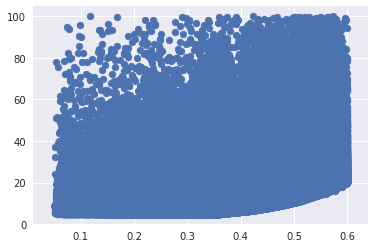

In [420]:
keep = cutter([0, 100], [0, 0.6])
fig, ax = plt.subplots()
ax.scatter(rmcat['Z'][keep], rmcat['LAMBDA_CHISQ'][keep])

## Computing the Conditional Mass Function

$$ \Phi = \Phi_C + \Phi_S $$

$$ \Phi_C(M) = \frac{\Sigma_{i \in clusters} \Sigma_{j \in galaxies \, in \, i}p_{cen,j}}{N_{cl}\Delta\log M} $$

$$ \Phi_S(M) = \frac{\Sigma_{i \in clusters} \Sigma_{j \in galaxies \, in \, i}p_{mem,j}(1-p_{cen,j})}{N_{cl}\Delta\log M} $$

This just means add up the component for each galaxy in each cluster... Very pain-in-the-ass notation.

Map richness to M500

/usr/local/anaconda3/envs/py35/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


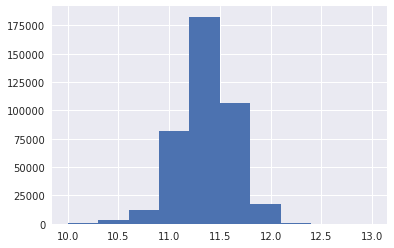

In [421]:
masssep = np.linspace(min(rmcat['MSTAR_50'][keep]), max(rmcat['MSTAR_50'][keep]), numslices)
mdiff = masssep[1]-masssep[0]
masschunks = plt.hist(rmcat['MSTAR_50'][keep], bins=numslices)

In [422]:
getdata(masses)
massarray = dicttomatrix(masses)

/usr/local/anaconda3/envs/py35/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


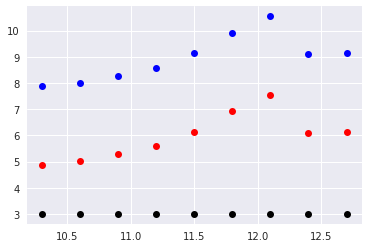

In [428]:
plt.figure()
for ii in range(1, numslices):
    if len(massarray[ii] > 0):
        phic = np.sum(rmcat['P_CEN'][massarray[ii]])/(len(massarray[ii])*mdiff)
        phis = np.sum(rmcat['P_SAT'][massarray[ii]])/(len(massarray[ii])*mdiff)
        phi = phic + phis 
        plt.plot(masschunks[1][ii], phic, 'ko')
        plt.plot(masschunks[1][ii], phis, 'ro')
        plt.plot(masschunks[1][ii], phi, 'bo')